In [1]:
!pip install transformers[torch] -q
!pip install numpy matplotlib -q

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import torch
import pandas as pd
import numpy as np
import os
from transformers import AutoTokenizer,AutoModelForMaskedLM
from transformers import pipeline
import re

In [4]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [5]:
model1=AutoModelForMaskedLM.from_pretrained('sampathlonka/San-RoBERTa') 
model1

RobertaForMaskedLM(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-5): 6 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): La

In [6]:
tokenizer1=AutoTokenizer.from_pretrained('sampathlonka/San-RoBERTa')
tokenizer1

RobertaTokenizerFast(name_or_path='sampathlonka/San-RoBERTa', vocab_size=30522, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'sep_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'pad_token': AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'cls_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=True)}, clean_up_tokenization_spaces=True)

In [7]:
folder_names = []
texts=[]

In [8]:
folder_path = '/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa'

# List all files in the folder
for folder_name in os.listdir(folder_path):
    folder_dir = os.path.join(folder_path, folder_name)
    print(folder_dir)
    df = pd.read_excel(folder_dir)
    # Iterate through each row and store it as a list
    for index, row in df.iterrows():
        t = row.tolist()
        texts.append(t)
        folder_names.append(folder_name[:-5])
df = pd.DataFrame({'Text': texts, 'FolderName': folder_names})

/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_04.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_19.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_07.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_08.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_11.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_02.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_01.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_13.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_12.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_09.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_06.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_17.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/raghuvamsha_sarga_14.xlsx
/kaggle/input/mahakavyas/Raghuvamsa/Raghuvamsa/ragh

In [9]:
# len(texts)
# df.Text[580]
# df.FolderName[580]

In [10]:
# Define custom functions to process text within a list
def process_text(text_list):
    processed_text_list = []
    for text in text_list:
        # Remove newline characters '\n' and tab characters '\t'
        cleaned_text = text.replace('\n', '').replace('\t', '')
        cleaned_text = re.sub('[॥.*?॥]|[॥]', '', cleaned_text) # replaces ॥ text ॥ or॥ by a ।
        cleaned_text = re.sub('।','',cleaned_text)
        cleaned_text = re.sub('१','',cleaned_text)
        cleaned_text = re.sub('६','',cleaned_text)
        cleaned_text = re.sub('२','',cleaned_text)
        cleaned_text = re.sub('३', '',cleaned_text)
        cleaned_text = re.sub('४', '',cleaned_text)
        cleaned_text = re.sub('o','',cleaned_text)
        cleaned_text = re.sub('५', '',cleaned_text)
        cleaned_text = re.sub('९', '',cleaned_text)
        cleaned_text = re.sub('७', '',cleaned_text)
        cleaned_text = re.sub('०', '',cleaned_text)
        cleaned_text = re.sub('८', '',cleaned_text)
        cleaned_text = re.sub('-', '',cleaned_text)
        # Split by '||' and keep only the part before it
        cleaned_text = cleaned_text.split('||')[0].strip()
        processed_text_list.append(cleaned_text)
    return processed_text_list

# Apply the custom function to each row of the 'Text' column
df['Text'] = df['Text'].apply(process_text)

# Display the modified DataFrame
print(df)

                                                   Text            FolderName
0     [स राज्यं गुरुणा दत्तं प्रतिपद्याधिकं बभौ|दिना...  raghuvamsha_sarga_04
1     [दिलीपानन्तरं राज्ये तं निशम्य प्रतिष्ठितम्|पू...  raghuvamsha_sarga_04
2     [पुरुहूतध्वजस्येव तस्योन्नयनपङ्क्तयः|नवाभ्युत्...  raghuvamsha_sarga_04
3     [सममेव समाक्रान्तं द्वयं द्विरदगामिना|तेन सिंह...  raghuvamsha_sarga_04
4     [छायामण्डललक्ष्येण तमदृश्या किल स्वयम्|पद्मा प...  raghuvamsha_sarga_04
...                                                 ...                   ...
1642            [अथ स विषयव्यावृत्तात्मा यथाविधि सूनवे]  raghuvamsha_sarga_03
1643  [नृपतिककुदं दत्त्वा यूने सितातपवारणम्|मुनिवनतर...  raghuvamsha_sarga_03
1644            [गलितवयसामिक्ष्वाकूणामिदं हि कुलव्रतम्]  raghuvamsha_sarga_03
1645    [इति कालिदास कृत रघुवंश महाकाव्ये तृतीयः सर्गः]  raghuvamsha_sarga_03
1646                                              [)0(]  raghuvamsha_sarga_03

[1647 rows x 2 columns]


In [11]:
df

,Text,FolderName
0,[स राज्यं गुरुणा दत्तं प्रतिपद्याधिकं बभौ|दिना...,raghuvamsha_sarga_04
1,[दिलीपानन्तरं राज्ये तं निशम्य प्रतिष्ठितम्|पू...,raghuvamsha_sarga_04
2,[पुरुहूतध्वजस्येव तस्योन्नयनपङ्क्तयः|नवाभ्युत्...,raghuvamsha_sarga_04
3,[सममेव समाक्रान्तं द्वयं द्विरदगामिना|तेन सिंह...,raghuvamsha_sarga_04
4,[छायामण्डललक्ष्येण तमदृश्या किल स्वयम्|पद्मा प...,raghuvamsha_sarga_04
...,...,...
1642,[अथ स विषयव्यावृत्तात्मा यथाविधि सूनवे],raghuvamsha_sarga_03
1643,[नृपतिककुदं दत्त्वा यूने सितातपवारणम्|मुनिवनतर...,raghuvamsha_sarga_03
1644,[गलितवयसामिक्ष्वाकूणामिदं हि कुलव्रतम्],raghuvamsha_sarga_03
1645,[इति कालिदास कृत रघुवंश महाकाव्ये तृतीयः सर्गः],raghuvamsha_sarga_03


In [12]:
# for i in range(len(df)):
#     print(df.Text[i])

In [13]:
embedding=[]

In [14]:
for i in range(len(df)):
    with torch.no_grad():
        t = tokenizer1.encode(df.Text[i][0],max_length=512, padding=True, truncation=True, return_tensors="pt")
        model_output = model1.roberta(t).last_hidden_state
        model_output = model_output.squeeze()
        out = torch.mean(model_output,dim=0)
        out_numpy = out.numpy()
        embedding.append(out_numpy)

In [15]:
embedding[500].shape

(768,)

In [16]:
data= np.array(embedding)
data

array([[-0.49682042,  0.54643416, -0.36257288, ..., -2.0129158 ,
         0.5384725 , -0.15341996],
       [-0.4964474 ,  0.562667  , -0.23860095, ..., -1.924284  ,
         0.3026324 ,  0.00743775],
       [-0.51012224,  0.55609816, -0.07231776, ..., -1.5105032 ,
         0.20279191, -0.3412476 ],
       ...,
       [-0.6066844 ,  0.5216721 , -0.20911671, ..., -1.9397472 ,
        -0.17009619, -0.4296145 ],
       [-0.4448474 ,  0.4252232 , -0.02444205, ..., -2.2806392 ,
         0.5169363 , -0.2065572 ],
       [-0.08540783, -0.15971816,  0.31644854, ..., -2.2567506 ,
         0.03538389, -0.3173607 ]], dtype=float32)

In [17]:
data.shape

(1647, 768)

# t-SNE Visualization

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [19]:
# Create a t-SNE object
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=0)

# Apply t-SNE to the scaled data
tsne_result = tsne.fit_transform(data)

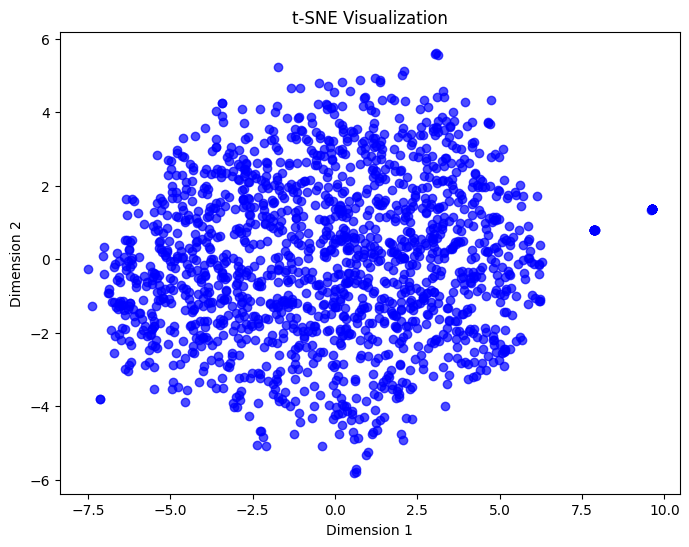

In [20]:
# Create a scatter plot of the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], marker='o', c='b', alpha=0.7)
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

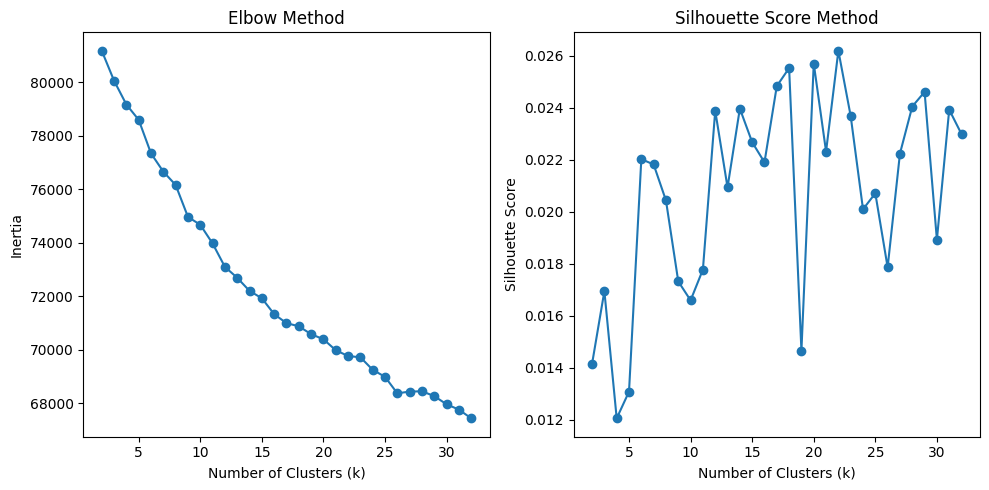

Silhouette Score for 3 clusters: 0.016946803778409958


In [21]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Generate random data for demonstration (replace with your data)
np.random.seed(0)
#data = np.random.rand(95, 768)

# Step 1: Dimensionality Reduction (PCA)
n_components = 50  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data)

# Step 2: Feature Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pca)

# Step 3: Choosing the Number of Clusters (k)
k_values = range(2, 33)
inertia_values = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plot the Elbow Method to choose k
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')

plt.tight_layout()
plt.show()

# Based on the plots, choose an appropriate value of k

# Step 4: K-means clustering with chosen k
chosen_k = 3  # Replace with your chosen k
kmeans = KMeans(n_clusters=chosen_k, random_state=0)
kmeans.fit(data_scaled)

# Step 5: Evaluate the Results (Silhouette Score)
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Score for {chosen_k} clusters: {silhouette_avg}")